In [2]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
Iris=pd.read_csv('Iris.csv')
Iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
23,5.1,3.3,1.7,0.5,Iris-setosa
81,5.5,2.4,3.7,1.0,Iris-versicolor
141,6.9,3.1,5.1,2.3,Iris-virginica
51,6.4,3.2,4.5,1.5,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
107,7.3,2.9,6.3,1.8,Iris-virginica
39,5.1,3.4,1.5,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
110,6.5,3.2,5.1,2.0,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica


## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [4]:
Iris.isnull().any()

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

In [5]:
Iris.fillna(Iris.median(),inplace=True)
Iris

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [6]:
Iris["Class"].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Class, dtype: int64

In [7]:
cleanup_nums = {"Class":  {"Iris-virginica": 0, "Iris-setosa": 1 , "Iris-versicolor": 2 }}
Iris.replace(cleanup_nums, inplace=True)
Iris

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [8]:
Iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,-0.322522
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.192719
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,-0.299942
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,-0.375715
Class,-0.322522,-0.192719,-0.299942,-0.375715,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [9]:
Iris.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

## Question 6

*Plot the scatter matrix for all the variables.*

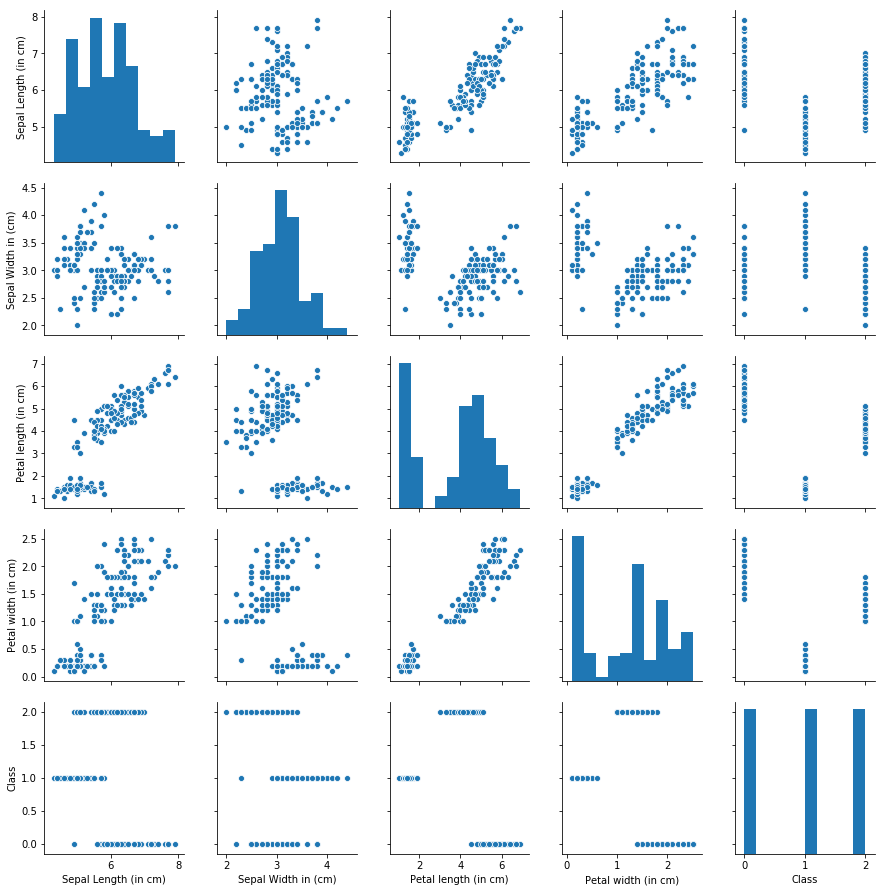

In [10]:
sns.pairplot(Iris)

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [11]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(Iris, train_size=0.8)
training

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
76,6.8,2.8,4.8,1.4,2
110,6.5,3.2,5.1,2.0,0
58,6.6,2.9,4.6,1.3,2
146,6.3,2.5,5.0,1.9,0
134,6.1,2.6,5.6,1.4,0
80,5.5,2.4,3.8,1.1,2
97,6.2,2.9,4.3,1.3,2
95,5.7,3.0,4.2,1.2,2
6,4.6,3.4,1.4,0.3,1
74,6.4,2.9,4.3,1.3,2


In [12]:
#Split in x and y dataset , y = target
y=Iris.Class
x=Iris.drop(["Class"],axis=1)

In [13]:
# split datasets in 80-20 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [14]:
# 80% in training dataset
print("Shape for 80% dataset:",(x_train.shape))
# 20% in training dataset
print("Shape for 20% dataset:",(x_test.shape))

Shape for 80% dataset: (120, 4)
Shape for 20% dataset: (30, 4)


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [15]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [16]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

In [17]:
# Accuracy of the model with different values of k=9.
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=9)  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=9, p=2,
           weights='uniform')

In [18]:
y_pred = classifier.predict(X_test) 
y_pred

array([1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2], dtype=int64)

In [19]:
type(y_test)

pandas.core.series.Series

In [20]:
y_pred1=pd.DataFrame(y_pred)
type(y_pred1)

pandas.core.frame.DataFrame

In [21]:
df_c = pd.concat([y_pred1.reset_index(drop=True), y_test.reset_index(drop=True)], axis=1)
df_c

,0,Class
0,1,1
1,2,2
2,2,2
3,2,0
4,0,0
5,1,1
6,0,0
7,2,0
8,2,2
9,0,0


In [22]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred)) 

[[10  0  2]
 [ 0 10  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00        10
           2       0.80      1.00      0.89         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



In [23]:
from sklearn.metrics import accuracy_score
print("Accuracy score for k=9:" ,accuracy_score(y_test, y_pred))

Accuracy score for k=9: 0.9333333333333333


In [24]:
# Accuracy of the model with different values of k=5.
classifier1 = KNeighborsClassifier(n_neighbors=5)  
classifier1.fit(X_train, y_train) 
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 2, 2, 2, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2], dtype=int64)

In [25]:
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))  
print("Accuracy score for k=5:",(accuracy_score(y_test, y_pred1)))

[[11  0  1]
 [ 0 10  0]
 [ 1  0  7]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        12
           1       1.00      1.00      1.00        10
           2       0.88      0.88      0.88         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Accuracy score for k=5: 0.9333333333333333


In [26]:
# Accuracy of the model with different values of k=3.
classifier1 = KNeighborsClassifier(n_neighbors=3)  
classifier1.fit(X_train, y_train) 
y_pred1 = classifier1.predict(X_test)
y_pred1

array([1, 2, 2, 2, 0, 1, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 2, 1, 2, 2], dtype=int64)

In [27]:
print(confusion_matrix(y_test, y_pred1))  
print(classification_report(y_test, y_pred1))  
print("Accuracy score for k=3:",(accuracy_score(y_test, y_pred1)))

[[10  0  2]
 [ 0 10  0]
 [ 0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.83      0.91        12
           1       1.00      1.00      1.00        10
           2       0.80      1.00      0.89         8

   micro avg       0.93      0.93      0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30

Accuracy score for k=3: 0.9333333333333333


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [28]:
y_test_np=np.asarray(y_test)
print(type(y_test_np))

<class 'numpy.ndarray'>


In [29]:
error = []

# Calculating error for K values between 1 and 19
for i in range(1, 19):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    #iter_acc=accuracy_score(y_test,pred_i)
    #iter_err=100.0-(iter_acc.astype(float))
    #iter_err=np.sum(y_test == pred_i)
    error.append(np.mean(pred_i != y_test_np))

In [30]:
error

[0.0,
 0.06666666666666667,
 0.06666666666666667,
 0.03333333333333333,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.03333333333333333,
 0.06666666666666667,
 0.03333333333333333]

In [ ]:
#Lowest MSE is with neighbours n =1 ,10 ,11,12,13,14,15

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

Text(0, 0.5, 'Mean Error')

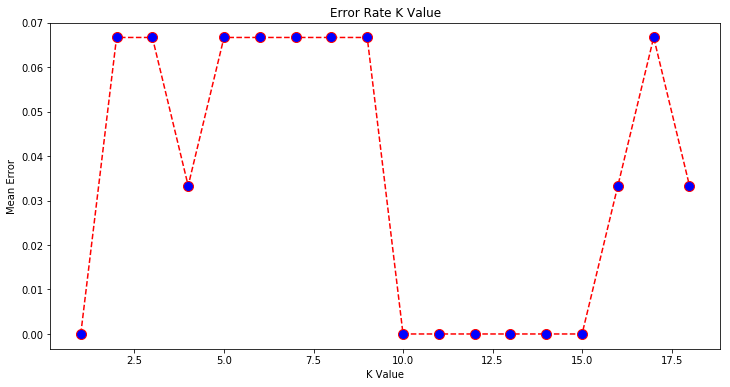

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 19), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

# Naive Bayes with Iris Data

In [33]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [34]:
#Species is represented as Class in dataset
y = Iris.Class
X = Iris.drop('Class', axis=1)

In [40]:
#Check the dataset
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64


In [41]:
print(X.head())

   Sepal Length (in cm)  Sepal Width in (cm)  Petal length (in cm)  \
0                   5.1                  3.5                   1.4   
1                   4.9                  3.0                   1.4   
2                   4.7                  3.2                   1.3   
3                   4.6                  3.1                   1.5   
4                   5.0                  3.6                   1.4   

   Petal width (in cm)  
0                  0.2  
1                  0.2  
2                  0.2  
3                  0.2  
4                  0.2  


# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

In [59]:
y = Iris.Class
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Class, dtype: int64

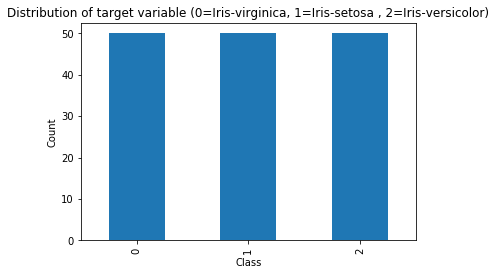

In [44]:
#Plot the distribution of target variable using histogram
plt.figure()
pd.Series(Iris['Class']).value_counts().sort_index().plot(kind = 'bar')
plt.ylabel("Count")
plt.xlabel("Class")
plt.title('Distribution of target variable (0=Iris-virginica, 1=Iris-setosa , 2=Iris-versicolor)');

In [49]:
#Drop Id variable from data
Iris.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


### Question 12 
Find Correlation among all variables and give your insights 

In [ ]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [46]:
Iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,-0.322522
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.192719
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,-0.299942
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,-0.375715
Class,-0.322522,-0.192719,-0.299942,-0.375715,1.000000


In [ ]:
# Insights from data

# 1) Sepal length is highly correlated to Petal Length(0.87) and Petal Width(0.81).
#->It denotes that with increase in value of sepal length , petal length and petal width would also increase.
#->It denotes that with decrease in value of sepal length , petal length and petal width would also decrease 
#->Sepal length is directly proportional to behaviour of petal length and petal width.

# 2) Sepal Width is negatively correlated to all variables.
# -> with increase in value of sepal width all other variables would decrease.
# -> Sepal width is inversely proportional to the behaviour of all other variables.

# 3) Petal Length is highly correlated to Petal Width(0.96) and Sepal Length(0.87).
#->It denotes that with increase in value of petal length , petal width and Sepal Length would also increase.
#->It denotes that with decrease in value of petal length , petal width and Sepal Length would also decrease 
#->Petal length is directly proportional to behaviour of petal width and Sepal Length.

# 4) Petal Width is highly correlated to Petal Length(0.96) and Sepal Length(0.81).
#->It denotes that with increase in value of Petal Width , petal length and Sepal Length would also increase.
#->It denotes that with decrease in value of Petal Width , petal length and Sepal Length would also decrease 
#->Petal Width is directly proportional to behaviour of petal length and Sepal Length.


### Split data in Training and test set in 80:20.

In [50]:
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2)

### Question 13 
Do Feature Scaling 

In [51]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Question 14 
Train and Fit NaiveBayes Model

In [52]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB()
clf_GNB = clf_GNB.fit(X_train, y_train)

In [53]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)
y_pred_GNB

array([2, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2,
       2, 1, 1, 0, 2, 1, 1, 1], dtype=int64)

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [54]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_GNB)
print(confusion_matrix)

[[ 8  0  1]
 [ 0 10  0]
 [ 0  0 11]]


In [55]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_GNB)

0.9666666666666667

In [56]:
#Show precision and Recall metrics
print(classification_report(y_test, y_pred_GNB)) 

              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       1.00      1.00      1.00        10
           2       0.92      1.00      0.96        11

   micro avg       0.97      0.97      0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



In [ ]:
#Conclude your findings

#Accuracy -> accuracy is the ratio of correct predictions to total predictions made.
#->Our model can predict 96% predictions correctly.

#Confusion matrix ->It is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known.

#Precision ->It refers to the percentage of your results which are relevant(0 to 1 range).
#->In the model 97% of results are relevant.

#Recall ->It is the percentage of total relevant results correctly classified by your algorithm
#-> In the model 97% of results are correcly classified by algorithm.